<a href="https://colab.research.google.com/github/Victor-RCC/Checkpoint-1-Machine-Learning/blob/main/CheckPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
aptosData = pd.read_csv("aptos.csv")
aptosData.head(15)




,metros,valor,quartos,vagas,reformado,bairro
0,107,560,3,2,0,Vila Lusitania
1,107,555,3,2,1,Vila Lusitania
2,49,196,2,1,0,Ferrazopolis
3,104,515,3,2,1,Centro
4,92,560,3,2,1,Vila Lusitania
5,51,249,2,1,0,Taboao
6,140,635,4,3,1,Centro
7,50,210,2,1,1,Demarchi
8,93,450,3,2,0,Baeta Neves
9,107,425,3,2,1,Rudge Ramos


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   ..:.Metros:  tamanho do apartamento 
-   ..:.Valor:  valor do apartamento
-   ..:.quartos:  quantidade de quartos do apartamento
-   ..:.vagas:  quantidade de vagas de garagem
-   ..:.reformado:  0 = não reformado 1 = reformado


**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  ...Eu acho que o valor do apartamento sobe de acordo com o tamanho em metros 
2.  ...Eu acho que o valor do apartamento sobe caso reformado.

## 2. Análise descritiva de dados

1.   Item da lista
2.   Item da lista



Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [ ]:
aptosData2 = aptosData[['metros','valor','bairro']]

aptosData2.head(15)



,metros,valor,bairro
0,107,560,Vila Lusitania
1,107,555,Vila Lusitania
2,49,196,Ferrazopolis
3,104,515,Centro
4,92,560,Vila Lusitania
5,51,249,Taboao
6,140,635,Centro
7,50,210,Demarchi
8,93,450,Baeta Neves
9,107,425,Rudge Ramos


c:\users\victo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\users\victo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


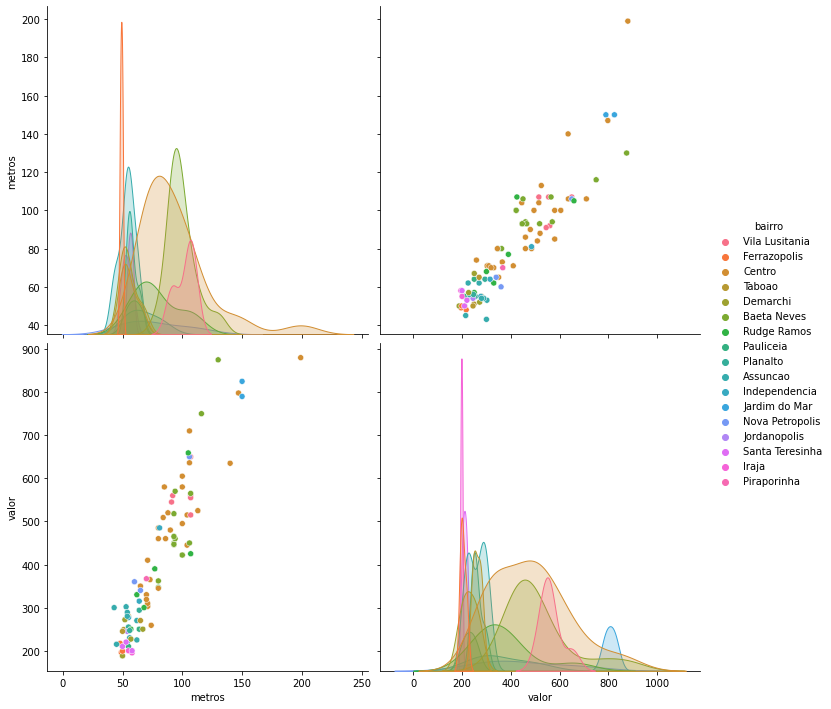

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(aptosData2, hue='bairro', height=5)
plt.show()




### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

Não, o método  de ánalise adotado foi criar um grafico onde mostra os metros, valores e bairros , e assim verificando as causas nos valores dos apartamentos.

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para determinação do valor de um imóvel? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [x] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

    Supervionado porque queremos saber quais fatores leval o apartamento a ser mais caro

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo: Regressão linear

2. algoritimo: Regressão logística polinominal

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo Regressão linear: recebe um conjunto de dados e representa por meio de uma reta.
2. algoritimo Regressão polinominal: 

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
x = aptosData[['quartos','vagas','reformado','metros']]

y = aptosData[['valor']]






Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

modelo = LinearRegression()

modelo.fit(X_treino, Y_treino)

predicao = modelo.predict(X_teste)

print("\nR2-score: %.2f" % r2_score(predicao , Y_teste))





(80, 4)
(20, 4)
(80, 1)
(20, 1)

R2-score: 0.78


### Algoritmo 2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 1
modelo = KNeighborsClassifier(n_neighbors=k)

modelo.fit(X_treino, Y_treino)

predicao = modelo.predict(X_teste)

print("\nR2-score: %.2f" % r2_score(predicao , Y_teste))


R2-score: 0.75


c:\users\victo\appdata\local\programs\python\python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | 0.78 | 0.75 |

**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O KNN teve o melhor resultado com 72% de acurácia.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 65m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
df = [[2,2,1,65]]
predicao = modelo.predict(df)
print(predicao)

[[347.19567305]]


## 5. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: Sim, pois conseguimos obter o valor final do apartamento

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Não faria nada, pois o resultado já foi obtido com sucesso




